# OpenCV
`openCV` is probably the most widely used open-source image library used in C++ and Python. It provides a lot of functionalities to manipulate images. Some of which will be discussed in this notebook.

Its basic functionalities contain
- importing images
- changing colourspaces (RGB, BGR, HSV, Grayscale etc.)
- edge detection
- finding contours in images
- rotating images

and many more. An extensive documentation including examples can be found [[here]](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html).

More complex functionalities are for example gesture recognition and face detection which are provided by openCV for free and can be encorporated into software if required.

The first step here is downloading the library, since it is not part of Python's default libraries. There are two different libraries of `openCV` available for download. The "normal" and the "contribution" version. The "contribution" version contains a lot more functions that do not 100% work with all operating systems. The functions we will be using here are all part of the "normal" distribution. So it is your own choice which to install. Both versions below.

`pip install opencv-python`

`pip install opencv-contrib-python`

After doing this, we first import the library and then create a variable for an image and plot it using `matplotlib`.

In [ ]:
#importing libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

#loading an image to a variable
img = cv2.imread('mark_0.jpg')
#plotting image

%matplotlib inline
plt.imshow(img)

As can be seen, the imqge is plotted just like the numpy arrays in the previous course. `OpenCV` has its own function for plotting. The reason `matplotlib` is used here is for its additional functionalities besides displaying images such as zooming, being able to access pixel information and automatically scaling the image to the window.

An example for `openCV's` plotting function below.

In [ ]:
#plotting image. Title is necessary
cv2.imshow('image title',img)
#this function loops, and the waitkey tells how long to wait during each loop.
#software freezes/crashes if forgotten
cv2.waitKey(0)
#all windows destroyed when closed. Otherwise new window would be opened 
cv2.destroyAllWindows()

**Question:**

The images from the `matplotlib` and `openCV` `imshow()` functions are different. Can you guess what happened?

**Answer:**



### Saving Images
The ability to save images is instrumental when working on them. `openCV` provides the `imwrite()` function for this. It requires a name and an image. It automatically overwrites images of the same name, so be careful when naming images.

In [ ]:
#saving image to directory
cv2.imwrite('myImage_INTP.png', img)

---
### Colorspaces
The RGB Colourscheme is something everyone should be familiar with. It contains all the displayable colours of an image in three channels with a minimum value of 0 and a maximum value of 255 for each channel. These channels are R --> RED, G --> Green, B --> Blue.

Images in `openCV` are `numpy` arrays of shape (n Rows, m Columns, 3) with the third dimension being the colour channels. Sometimes there is a fourth `alpha` channel used for transparency.

In [ ]:
img.shape

There are different colourspaces available in `openCV` the four most commonly used ones were already mentioned. RGB, BGR, HSV and Grayscale.
- RGB( 3 channels) --> Red, Green, Blue
- BGR( 3 channels) --> Blue, Green, Red
- HSV( 3 channels) --> Hue (colour tone/tint), saturation, value (lightness)
- Gray( 1 channel) --> Gray

They each have different advantages when working with images, some of which will be explained at a later point. `openCV` provides a function to convert these colourspaces called `cvtColor()`.

It requires the image and the two colourspaces between which to convert as an input. Some examples below.

In [ ]:
#bgr to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(131),plt.title('Grayscale'), plt.imshow(img_gray, cmap = 'gray')
plt.subplot(132),plt.title('RGB'), plt.imshow(img_rgb)
plt.subplot(133),plt.title('BGR'), plt.imshow(img)

---
### Selecting image cut-outs
Since images are `numpy` arrays, `slicing` and any other `numpy` operations are possible on them. `openCV` provides some of these functions itself as well. Slicing is done exactly the same way as before. This image slice can also be saved as an independent image file if necessary.

In [ ]:
img_part = img_rgb[10:100,10:100,:]
plt.imshow(img_part)

---
### Resizing image
Resizing images is an important step for data pre-processing in the field of deep-learning. As networks are trained on a certain image shape, it is necessary to bring images into the required shape. `openCV` provides the aptly named `resize()` function for this. Its arguments are as follows:
- image to resize
- new size as a tuple (height, width)
- interpolation method

Resizing images results in a new resolution of the image. This also means that the pixels' values are changed. How they are adapted is decided by the interpolation method. A short description on this can be found [here](https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/).

In the following example we are going to downsample the `img` we previously used to 80% of its original size. We will output the shape of both the original and the resized image.

**Question:**

Why is the command `int()` used?

In [ ]:
#getting shape
original_shape = img.shape
print('Original Shape:',original_shape)

#setting new shape to 80% of original
new_width = int(original_shape[0]*5)
new_height = int(original_shape[1]*5)

#resizing image
resized_img = cv2.resize(img, (new_height, new_width), cv2.INTER_LANCZOS4)
print('New Shape:', resized_img.shape)

#displaying image
cv2.imshow('New Image',resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


---
### Image Thresholding
Thresholding is very similar to using masks in `numpy`. Thresholding can be done on colour images as well as graysscale images, in this example we will use a colour image. Using a colour image, a threshold for the pixelvalue is set. Any pixel above or below this value ( depending on the algorithm)  will be set to the maximum value set as the third argument in function. Please keep consolodating the [official documentation](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html) for extensive information, as this is more of a general overview.

The `cv2.threshold()` function arguments are:
- the image to do thresholding on
- the threshold lower bound
- maximum value
- the operations on the values inside and outside the boundary

In [ ]:
retVal,thresholding_img = cv2.threshold(img,30,255,cv2.THRESH_BINARY)
plt.imshow(thresholding_img, cmap = 'gray')
print('Max value:', np.max(thresholding_img))

**Task:**

Now use this `thresholding_img` to create a mask and change every pixel of the `img` variable that overlaps with the mask's *black* pixels into a white pixel.

**Answer:**

In [ ]:
#task

---
### Solution

In [ ]:
#check, if the image still has three colour channels. If yes, change it to grayscale
if len(thresholding_img.shape) > 2:
    thresholding_img = cv2.cvtColor(thresholding_img, cv2.COLOR_BGR2GRAY)

#create mask    
mask_task1 = thresholding_img == 0

#create copy of original image, so the original is not changed
img_task1 = np.copy(img)
# use mask
img_task1[mask_task1] = [255,255,255]

#display image
cv2.imshow('My Image',img_task1)
cv2.waitKey(0)
cv2.destroyAllWindows()

---
### Edge Detection
Edge detection makes it possible to find outlines of objects in images. This is done by iterating over an image using a `kernel`. That highlights drastic colour changes in images and thereby decides where the outlines of objects are.

Two of such kernels are shown below. The **x-Direction** kernel finds vertical lines and the **y-Direction** kernel finds horizontal lines.
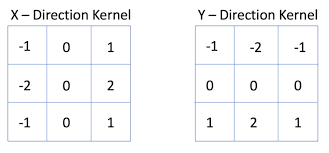

These kernels are not only used for edge detection but are the basis on which spatial dependencies in image recognition and classificaiton software work. Namely the Deep Learning method *Convolutional Neural Networks*.

The `Canny()` class of the `openCV` library implements this automatically. The required arguements are:
- input image --> MUST be grayscale
- minimum value for edge detection
- maximum value for edge detection
- optionally the kernelsize can be changed. By default it is a 3x3 kernel.

**Question:**

What difference can be seen between the two outputs?

In [ ]:
edge1 = cv2.Canny(img_gray, 0, 255)
#different bounds
edge2 = cv2.Canny(img_gray, 60, 255)
plt.subplot(121),plt.title('First'), plt.imshow(edge1, cmap = 'gray')
plt.subplot(122),plt.title('Second'), plt.imshow(edge2, cmap = 'gray')

### Using Webcam to stream video
Using images from the computer is all nice and good, but we also want to use the images taken from our own devices or even use a livestream or provided video.

To access your computer's camera and output the images it takes openCV provides the `VideoCapture()` class. It takes one argument which can be either a `string` pointing to a file or an integer. The integer is pointing at the camera with `0` being the default device of your computer.

In [ ]:
cap = cv2.VideoCapture(0)

To get the outputof the camera, use the following `read()` function which return a boolean and the image. The boolean states, whether or not an image was returned. 

In [ ]:
ret,frame = cap.read()
plt.imshow(frame)

Now that we can get an image and plot it, we want a livestream as well. By using an endless `while` loop it is possible to stream the video from the camera. By default the FPS (Frames per second) is 30. This is plenty for normal tasks.

Now we only need to output the image not using `matplotlib` but `openCV's` own function for image output, which we have already used before.

Since it will be necessary to exit the while loop at some point, we also create a condition for it. In this example the while loop will be exited once the **q** button on the keyboard is used.

You could also save the current image when **q** is pressed.

In the end all windows created by this while loop are destroyed and the camera is released, meaning it is no longer blocked for other software by this program.

Since you may want to use this loop multiple times, the `cap.release()` function is disabled by default. You are free to enable it, but then remember to call the `VideoCapture()` class again.

In [ ]:
while True:
    #getting images from camera
    ret ,frame = cap.read()

    if ret == True:
        #show image in window
        cv2.imshow('Livestream',frame)

        #specify what should happen if certain keys are pressed.
        #Add more keys for more functions or multiple functions for one button
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        if cv2.waitKey(1) & 0xFF == ord('s'):
            cv2.imwrite('video_test.jpg', frame)

    else:
        break
#destroy all windows, otherwise the frame would keep popping up
cv2.destroyAllWindows()
# release camera
cap.release()

For an explanation why `& 0xFF` is used together with the `cv2.waitKey()` command, take a look at this [stackOverflow Thread](https://stackoverflow.com/questions/14713102/what-does-and-0xff-do).

### Applying Thresholding to a livestream video
The operations done on single images can also be applied to a livestream. And as long as the images are not too large and the computer is fast enough, it will work without a delay.

In the following example thresholding is applied to the livestream. This time `thresholding` will be applied to a grayscaled image.
 

In [ ]:
while True:
    #getting images from camera
    ret ,frame = cap.read()

    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        retVal,thresholding_img = cv2.threshold(gray,80,255,cv2.THRESH_BINARY)
        #show image in window
        cv2.imshow('Livestream',thresholding_img)

        #specify what should happen if certain keys are pressed.
        #Add more keys for more functions or multiple functions for one button
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        break
#destroy all windows, otherwise the frame would keep popping up
cv2.destroyAllWindows()
# release camera
#cap.release()

### Creating a mask for the original image
The argument `cv2.THRESH_BINARY` states that the returned image should only be of two values. Which is 0 for all pixels below the threshold and 255 for all pixels above it.

This makes it easy to create a mask and use slicing on the original image to return only those pixels above that were above the threshold but in the colored image.

In [ ]:
while True:
    #getting images from camera
    ret ,frame = cap.read()

    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        retVal,thresholding_img = cv2.threshold(gray,80,255,cv2.THRESH_BINARY)
        
        #creating mask that is true where img below threshold
        mask = thresholding_img == 0
        
        #creating a copy of the original image
        filtered = np.copy(frame)
        #applying mask to original image and change pixels to black
        filtered[mask] = [0,0,0]
        #putting images next to each other 
        complete_img = np.hstack((frame, filtered))
        #show image in window
        cv2.imshow('Livestream',complete_img)

        #specify what should happen if certain keys are pressed.
        #Add more keys for more functions or multiple functions for one button
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        break
#destroy all windows, otherwise the frame would keep popping up
cv2.destroyAllWindows()
# release camera
#cap.release()

### Task
Now, do the thing for the edge detection. Only the result should be, that the detected edges should be visible in the original image.

In [ ]:
#Task

---
### Solution

In [ ]:
while True:
    #getting images from camera
    ret ,frame = cap.read()

    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #using edge detection
        edges = cv2.Canny(gray, 60, 255)
        
        #creating mask that is true where there are edges detected
        mask = edges != 0
        
        #creating a copy of the original image
        original_edges = np.copy(frame)
        #applying mask to original image and change pixels to black
        original_edges[mask] = [0,0,0]
        #putting images next to each other 
        complete_img = np.hstack((frame, original_edges))
        #show image in window
        cv2.imshow('Livestream',complete_img)

        #specify what should happen if certain keys are pressed.
        #Add more keys for more functions or multiple functions for one button
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        break
#destroy all windows, otherwise the frame would keep popping up
cv2.destroyAllWindows()
# release camera
#cap.release()

### Finding Contours in images
Contours are similar to edges. The difference is, that contours are not returned as an array of the same dimensions as the input image, but as a list of numpy arrays. This list contains all the different contours found in an image. Each item in the list is a different contour, which can be used for various tasks such as
- tracking of objects
- estimating size and shape
finding the center of an object

The openCV function `findContours()` enables looking for contours in a grayscale image. It takes three input agruments:
- input image
- which contour layers to look for
- approximation type for contours

Of these, the second argument is important because it lets the user choose whether to only take the outer contour or a hierarchy of contours. For more detailed information on the **Hierarchy** go to the official [documentation](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_hierarchy/py_contours_hierarchy.html#contours-hierarchy)

The following example will return both, only the outside and the hierarchical contours in two lists.

In [ ]:
contour_image = cv2.imread('mark_2.jpg')
#changign colourspace for plotting
contour_image = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
#changing image to grayscale
img_grayscale = cv2.cvtColor(contour_image, cv2.COLOR_RGB2GRAY)
#Thresholding image
ret,thresh = cv2.threshold(img_grayscale,80,255,cv2.THRESH_BINARY)
#plotting images
plt.subplot(121), plt.title('original'),plt.imshow(contour_image, cmap = 'gray')
plt.subplot(122), plt.title('threshold'),plt.imshow(thresh, cmap = 'gray')

#getting contours of outer layer
outer_contour, outer_hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
#Getting contours of multiple layers
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
print('\nOuter Contour:\n',len(outer_contour))
print('Number of Contours:\n',len(contours))
for idx,contour in enumerate(contours):
    print('Points in contour', idx, ':',len(contour))

It can be seen, that many of the contours only have very few points. These are small areas that were mistakenly included in the contours. We will ignore them in the later detection.

If you only draw the points of the contours, you will get something like a scatter plot, since a new point is only set if the next pixel of the contour is not in a straight line with the past to pixels. So it is something like a **connect the dots** image.

The next task is to draw all the contours in our image. For this we will create a copy of the original image and so we do not have to reload it, since the markings will be permanent for the image.

OpenCV's `drawContours()` function will draw the contours for us. We can either draw all contours or draw them one at a time and leave out all contours with few points.

The `drawContours()` function takes five arguments:
- the image to draw on
- the contour or list of contours to draw
- index of contours --> -1 to draw all contours
- colour of contour
- thickness of contour --> -1 will fill the contour

In [ ]:
#creating copy
overlay = np.copy(contour_image)

#iterating over contours
list_of_contours_to_plot = []
#filling list of contours
for contour in contours:
    if len(contour) > 10: list_of_contours_to_plot.append(contour)
        
overlay = cv2.drawContours(overlay, list_of_contours_to_plot, 6, (0,255,0), -1)
    
plt.imshow(overlay)


The following example will only take one contour and fill it in completely with colour

In [ ]:
#creating copy
overlay = np.copy(contour_image)

#iterating over contours
list_of_contours_to_plot = []
#filling list of contours
for contour in contours:
    if len(contour) > 10: list_of_contours_to_plot.append(contour)
        
overlay = cv2.drawContours(overlay, list_of_contours_to_plot, 4, (0,255,0), -1)
    
plt.imshow(overlay)

A lot of different operations can be done on contours at this point such as finding its center or its most northern, eastern, southern or western point. Check the [documentation](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_properties/py_contour_properties.html) for more detailed information.

We will do some slicing again.

The first step is to create a mask. We will use our overlay image for this. We gave all the pixels the colour green (0,255,0) it is very unlikely that any real object has exactly this colour, to we will only extract these points from the image to create a mask and return that area from the original image.

In [ ]:
#creating mask
#mask has to be two dimensional, so we only take second layer
mask_contours = overlay[:,:,1] != 255

#using mask on original image
cut_out = np.copy(contour_image)
cut_out[mask_contours] = [0,0,0]

#plotting 
plt.subplot(121), plt.title('mask'),plt.imshow(mask_contours, cmap = 'gray')
plt.subplot(122), plt.title('cut_out'),plt.imshow(cut_out, cmap = 'gray')


### Task
Try using contour detection on a live videostream. What are the results? Does it work well? Could it be used to track objects? How can you improve the recognition? Did you find any other openCV functions that could be used to track objects?

In [ ]:
#task

---
### Solution

In [ ]:
while True:
    #getting images from camera
    ret ,frame = cap.read()

    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #using edge detection
        thres_return,thresh = cv2.threshold(gray,150,200,cv2.THRESH_BINARY)
        #Getting contours of multiple layers
        contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
        
        list_of_contours_to_plot = []
        for contour in contours:
            if len(contour) > 10: list_of_contours_to_plot.append(contour)
        
        #creating a copy of the original image
        overlay = np.copy(frame)
        overlay = cv2.drawContours(overlay, list_of_contours_to_plot, -1, (0,255,0), 1)
        #applying mask to original image and change pixels to black
        #putting images next to each other 
        complete_img = np.hstack((frame, overlay))
        #show image in window
        cv2.imshow('Livestream',complete_img)

        #specify what should happen if certain keys are pressed.
        #Add more keys for more functions or multiple functions for one button
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        break
#destroy all windows, otherwise the frame would keep popping up
cv2.destroyAllWindows()
# release camera
#cap.release()

### The HSV Colourspace

The HSV and RGB/BGR colourspaces differ greatly in their set-up and their applications. One of them is colourtracking. 
The RGB/BGR colourspace should be familiar to most.

![title](rgb.png)

The problem when tracking clours in the RGB clourspace come when you want to track a range of colours. If only a certain RGB should be tracked, this is no problem, but if the colour **Blue** should be tracked, it means every RGB value in a certain range. Which could be from light blue (RGB = \[63,242,252\]) to dark blue (RGB = \[35,40,245\]. The problem arises when iterating over the interval. What are the minimum and maximum values for each colour channel and what about the gray values? This is a major problem, since they must be ommitted in a very complicated way.

This is where the HSV colourscale shows its uses. The difference is in its three values. That, as explained before, are Hue (colour tone), Saturation, Value (lightness). A good representation of the colourspace is a cone.

![title](hsv.jpg)

By using the HSV colourspace and setting the **S**aturation and **V**alue to a reasonable minimum it is easy to select variety of similar colours in an iterval.

A good explanation on this and an interface to check colours can be found [here](http://colorizer.org/).

### Task
Now this next task is a bit more complex and contains multiple steps. What you have to do is creating an algorithms to display only certain fields of the following rubik's cube image.

![title](rubiks_cube.jpg)

1. Create a program that finds all green, red and blue fields in an image **separately** and plot these images next to each other in a single `openCV` window using `cv2.imshow()`.
2. Now take one of these, let's call them **Colourtrackers** , and use them on a livestream video from your camera and try to display only coloured objects.

Additional Task:

Try tracking the center of this object and display it in the original image. Here are some hints:
- make all highlighted colours the same value
- draw a shape on your original image based on this center using the `cv2.rectangle()` or `cv2.circle()` function


In [ ]:
#task

---
### Solution

### 1

In [ ]:
rubik_img = cv2.imread('rubiks_cube.jpg')
#change colourspace to hsv
rubik_img_hsv = cv2.cvtColor(rubik_img, cv2.COLOR_BGR2HSV)
red, green, blue = np.copy(rubik_img),np.copy(rubik_img),np.copy(rubik_img)
red_bounds = np.array([[0,50,50],[20,255,255]])
green_bounds = np.array([[50,50,50],[70,255,255]])
blue_bounds = np.array([[110,50,50],[130,255,255]])

red_mask = cv2.inRange(rubik_img_hsv, red_bounds[0], red_bounds[1])
red = cv2.bitwise_and(red, red, mask=red_mask)
green_mask = cv2.inRange(rubik_img_hsv, green_bounds[0], green_bounds[1])
green = cv2.bitwise_and(green, green, mask=green_mask)
blue_mask = cv2.inRange(rubik_img_hsv, blue_bounds[0], blue_bounds[1])
blue = cv2.bitwise_and(blue, blue, mask=blue_mask)

all_images = np.hstack((rubik_img, red, green, blue))
cv2.imshow("Rubik's Cube Images",all_images)
#this function loops, and the waitkey tells how long to wait during each loop.
#software freezes/crashes if forgotten

cv2.waitKey(0)
#all windows destroyed when closed. Otherwise new window would be opened 
cv2.destroyAllWindows()


---
### Solution

### 2

In [ ]:
#adapt bounds if necessary
red_bounds = np.array([[0,50,50],[20,255,255]])
green_bounds = np.array([[50,50,50],[70,255,255]])
blue_bounds = np.array([[110,50,50],[130,255,255]])

while True:
    #getting images from camera
    ret ,frame = cap.read()

    if ret == True:
        overlay = np.copy(frame)
        img_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        #change bounds to track or add additional bounds in another mask to track more colours
        mask = cv2.inRange(img_hsv, blue_bounds[0], blue_bounds[1])
        overlay = cv2.bitwise_and(overlay, overlay, mask=mask)
        complete_img = np.hstack((frame, overlay))
        #show image in window
        cv2.imshow('Livestream',complete_img)

        #specify what should happen if certain keys are pressed.
        #Add more keys for more functions or multiple functions for one button
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        break
#destroy all windows, otherwise the frame would keep popping up
cv2.destroyAllWindows()
# release camera
#cap.release()

---
### Solution Additional Task

In [ ]:
red_bounds = np.array([[0,50,50],[20,255,255]])
green_bounds = np.array([[40,80,80],[90,255,255]])
blue_bounds = np.array([[110,50,50],[130,255,255]])

while True:
    #getting images from camera
    ret ,frame = cap.read()

    if ret == True:
        overlay = np.copy(frame)
        img_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        #change bounds to track or add additional bounds in another mask to track more colours
        #tracking the green colour in this solution
        mask = cv2.inRange(img_hsv, green_bounds[0], green_bounds[1])
        
        #finding all pixels in the mask, that are true and 
        #taking the average of their x and y values
        counter = 0
        x,y = 0,0
        for idx, pixel in np.ndenumerate(mask):
            if pixel:
                x += idx[1]
                y += idx[0]
                counter += 1
        
        #if there is at least one pixel of the colour
        if counter > 0:
            x = int(x/counter)
            y = int(y/counter)
            #drawing a circle around the center
            cv2.circle(overlay, (x,y), 40, 2)
        
        complete_img = np.hstack((frame, overlay))
        #show image in window
        cv2.imshow('Livestream',complete_img)

        #specify what should happen if certain keys are pressed.
        #Add more keys for more functions or multiple functions for one button
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        break
#destroy all windows, otherwise the frame would keep popping up
cv2.destroyAllWindows()
# release camera
#cap.release()

In [ ]:
cap.release()